# Quickstart
Louis RICHARD (louis.richard@irfu.se)



## Getting Started
To get up and running with Python, virtual environments and pyRFU, see: \
https://pyrfu.readthedocs.io/en/latest/getting_started.html#installation

Python 3.7 or later is required; we recommend installing Anaconda to get
everything up and running.

### Virtual environments
It's best to setup and use virtual environments when using Python - these allow you to avoid common dependency problems when you install multiple packages\
`python -m venv pyrfu-tutorial`\
Then, to run the virtual environment, on Mac and Linux :\
`source pyrfu-tutorial/bin/activate`\
To exit the current virtual environment, type `deactivate`

### Install pyRFU
`pip install pyrfu`
### Upgrade pyRFU
`pip install pyrfu --upgrade`
### Local data directory
We use environment variables to set the local data directories:\
data_path (root data directory for all missions in pyRFU) e.g., if you set data_path="/Volumes/mms", your data will be stored in /Volumes/mms

The load routines supported include:
- Fluxgate Magnetometer (FGM)
- Search-coil Magnetometer (SCM)
- Electric field Double Probe (EDP)
- Fast Plasma Investigation (FPI)
- Hot Plasma Composition Analyzer (HPCA)
- Energetic Ion Spectrometer (EIS)
- Fly's Eye Energetic Particle Sensor (FEEPS)
- Ephemeris and Coordinates (MEC)

## Import MMS routines

In [1]:
from pyrfu import mms

Load IGRF coefficients ...


## Define time interval

In [2]:
tint = ["2019-09-14T07:54:00.000", "2019-09-14T08:11:00.000"]

## Setup the MMS data path
The MMS data path can be setup using mms.db_init

In [3]:
mms.db_init("/Volumes/mms")

### Data can also be downloaded directly from the MMS science data center using:

In [4]:
help(mms.download_data)

Help on function download_data in module pyrfu.mms.download_data:

download_data(var_str, tint, mms_id, login: str = '', password: str = '', data_path: str = '')
    Downloads files containing field `var_str` over the time interval
    `tint` for the spacecraft `mms_id`. The files are saved to `data_path`.
    
    Parameters
    ----------
    var_str : str
        Input key of variable.
    tint : list of str
        Time interval.
    mms_id : str or int
        Index of the target spacecraft.
    login : str, Optional
        Login to LASP MMS SITL. Default downloads from
        https://lasp.colorado.edu/mms/sdc/public/
    password : str, Optional
        Password to LASP MMS SITL. Default downloads from
        https://lasp.colorado.edu/mms/sdc/public/
    data_path : str, Optional
        Path of MMS data. If None use `pyrfu/mms/config.json`



In [5]:
help(mms.download_ancillary)

Help on function download_ancillary in module pyrfu.mms.download_ancillary:

download_ancillary(product, tint, mms_id, login: str = '', password: str = '', data_path: str = '')
    Downloads files containing field `var_str` over the time interval
    `tint` for the spacecraft `mms_id`. The files are saved to `data_path`.
    
    Parameters
    ----------
    product : {"predatt", "predeph", "defatt", "defeph"}
        Ancillary type.
    tint : list of str
        Time interval
    mms_id : str or int
        Spacecraft index
    login : str, Optional
        Login to LASP MMS SITL. Default downloads from
        https://lasp.colorado.edu/mms/sdc/public/
    password : str, Optional
        Password to LASP MMS SITL. Default downloads from
        https://lasp.colorado.edu/mms/sdc/public/
    data_path : str, Optional
        Path of MMS data. If None use `pyrfu/mms/config.json`



## Load data
Keywords to access data can be found in the help of mms.get_data

In [6]:
help(mms.get_data)

Help on function get_data in module pyrfu.mms.get_data:

get_data(var_str, tint, mms_id, verbose: bool = True, data_path: str = '')
    Load a variable. var_str must be in var (see below)
    
    Parameters
    ----------
    var_str : str
        Key of the target variable (use mms.get_data() to see keys.).
    tint : list of str
        Time interval.
    mms_id : str or int
        Index of the target spacecraft.
    verbose : bool, Optional
        Set to True to follow the loading. Default is True.
    data_path : str, Optional
        Path of MMS data. If None use `pyrfu/mms/config.json`
    
    Returns
    -------
    out : xarray.DataArray or xarray.Dataset
        Time series of the target variable of measured by the target
        spacecraft over the selected time interval.
    
    See also
    --------
    pyrfu.mms.get_ts : Read time series.
    pyrfu.mms.get_dist : Read velocity distribution function.
    
    Examples
    --------
    >>> from pyrfu import mms
    
   

### Load magnetic field from (FGM)

In [7]:
b_xyz = mms.get_data("b_gse_fgm_srvy_l2", tint, 1)

[21-Jul-23 09:26:54] INFO: Loading mms1_fgm_b_gse_srvy_l2...


### Time series are xarray.DataArray objects

In [8]:
b_xyz

<xarray.DataArray (time: 16320, represent_vec_tot: 3)>
array([[-2.1031418 , -1.6935391 ,  2.835863  ],
       [-2.1007674 , -1.7059438 ,  2.8462613 ],
       [-2.1185403 , -1.6850468 ,  2.8634877 ],
       ...,
       [-0.7177708 ,  1.81181   ,  5.15961   ],
       [-0.75993973,  1.8259526 ,  5.165373  ],
       [-0.7561481 ,  1.8053148 ,  5.204192  ]], dtype=float32)
Coordinates:
  * time               (time) datetime64[ns] 2019-09-14T07:54:00.006946627 .....
  * represent_vec_tot  (represent_vec_tot) <U1 'x' 'y' 'z'
Attributes: (12/17)
    CATDESC:            Magnetic field vector in Geocentric Solar Ecliptic (G...
    COORDINATE_SYSTEM:  GSE
    DEPEND_0:           Epoch
    DISPLAY_TYPE:       time_series
    FIELDNAM:           Magnetic field vector in GSE plus Btotal (8 or 16 S/s)
    FILLVAL:            -1e+31
    ...                 ...
    SI_CONVERSION:      1.0e-9>T
    TENSOR_ORDER:       1
    UNITS:              nT
    VALIDMAX:           [17000. 17000. 17000. 17000.]
    VALIDMIN:           [-17000. -17000. -17000.      0.]
    VAR_TYPE:           data

### Load ions and electrons bulk velocity, number density and DEF (FPI)

In [9]:
n_i, n_e = [mms.get_data(f"n{s}_fpi_fast_l2", tint, 1) for s in ["i", "e"]]
# n_i, n_e = [mms.get_data("n{}_fpi_fast_l2".format(s), tint, 1) for s in ["i", "e"]]
v_xyz_i, v_xyz_e = [mms.get_data(f"v{s}_gse_fpi_fast_l2", tint, 1) for s in ["i", "e"]]
def_omni_i, def_omni_e = [
    mms.get_data(f"def{s}_fpi_fast_l2", tint, 1) for s in ["i", "e"]
]

[21-Jul-23 09:26:55] INFO: Loading mms1_dis_numberdensity_fast...
[21-Jul-23 09:26:55] WARNING: /usr/local/lib/python3.10/site-packages/pyrfu/mms/get_ts.py:58: UserWarning: Epoch_plus_var/Epoch_minus_var units are not clear, assume s
  warnings.warn(message)

[21-Jul-23 09:26:55] INFO: Loading mms1_des_numberdensity_fast...
[21-Jul-23 09:26:55] INFO: Loading mms1_dis_bulkv_gse_fast...
[21-Jul-23 09:26:55] WARNING: /usr/local/lib/python3.10/site-packages/pyrfu/mms/get_ts.py:58: UserWarning: Epoch_plus_var/Epoch_minus_var units are not clear, assume s
  warnings.warn(message)

[21-Jul-23 09:26:55] INFO: Loading mms1_des_bulkv_gse_fast...
[21-Jul-23 09:26:55] WARNING: /usr/local/lib/python3.10/site-packages/pyrfu/mms/get_ts.py:58: UserWarning: Epoch_plus_var/Epoch_minus_var units are not clear, assume s
  warnings.warn(message)

[21-Jul-23 09:26:55] WARNING: /usr/local/lib/python3.10/site-packages/pyrfu/mms/get_ts.py:58: UserWarning: Epoch_plus_var/Epoch_minus_var units are not clear, ass

### Load electric field (EDP)

In [10]:
e_xyz = mms.get_data("e_gse_edp_fast_l2", tint, 1)

[21-Jul-23 09:26:55] INFO: Loading mms1_edp_dce_gse_fast_l2...


## Plot overview

### Import matplotlib and define backend

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

### Import pyrfu plotting routines

In [12]:
from pyrfu.plot import plot_line, plot_spectr

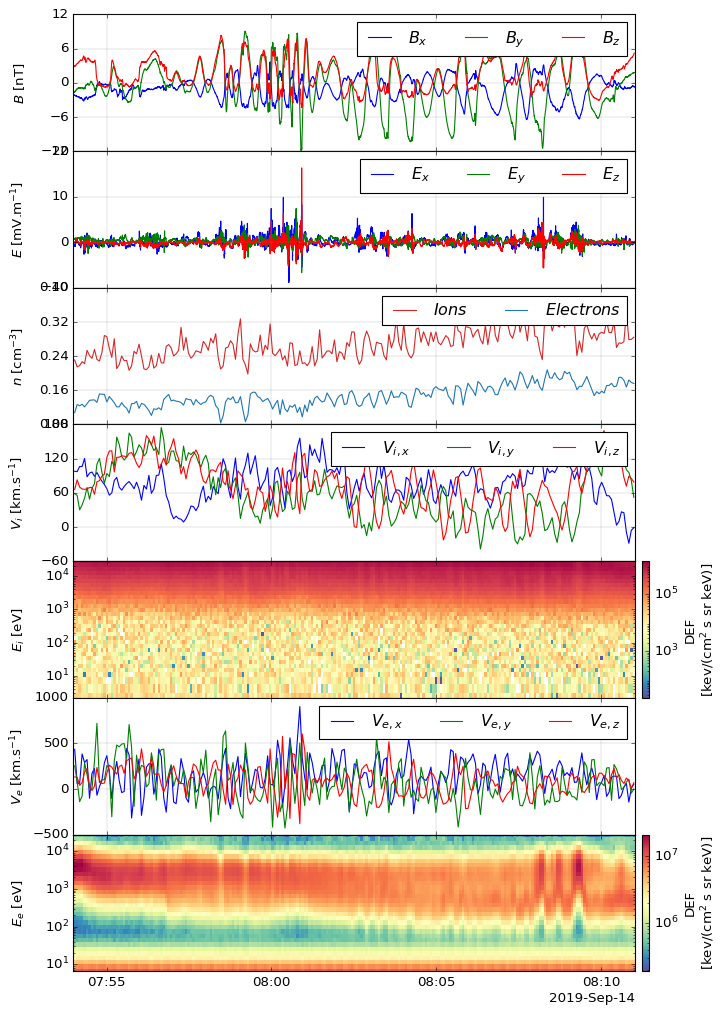

In [13]:
legend_options = dict(frameon=True, loc="upper right")

f, axs = plt.subplots(7, sharex="all", figsize=(9, 13))
f.subplots_adjust(hspace=0, left=0.1, right=0.88, bottom=0.05, top=0.97)

# magnetic field
plot_line(axs[0], b_xyz)
axs[0].legend(["$B_x$", "$B_y$", "$B_z$"], ncol=3, **legend_options)
axs[0].set_ylabel("$B$ [nT]")

# electric field
plot_line(axs[1], e_xyz)
axs[1].legend(["$E_x$", "$E_y$", "$E_z$"], ncol=3, **legend_options)
axs[1].set_ylabel("$E$ [mV.m$^{-1}$]")

# number density
plot_line(axs[2], n_i, color="tab:red")
plot_line(axs[2], n_e, color="tab:blue")
axs[2].legend(["$Ions$", "$Electrons$"], ncol=2, **legend_options)
axs[2].set_ylabel("$n$ [cm$^{-3}$]")

# Ion bulk velocity
plot_line(axs[3], v_xyz_i)
axs[3].legend(["$V_{i,x}$", "$V_{i,y}$", "$V_{i,z}$"], ncol=3, **legend_options)
axs[3].set_ylabel("$V_i$ [km.s$^{-1}$]")

# Ion DEF
axs[4], caxs4 = plot_spectr(
    axs[4], def_omni_i, yscale="log", cscale="log", cmap="Spectral_r"
)
axs[4].set_ylabel("$E_i$ [eV]")
caxs4.set_ylabel("DEF" + "\n" + "[kev/(cm$^2$ s sr keV)]")

# Electron bulk velocity
plot_line(axs[5], v_xyz_e)
axs[5].legend(["$V_{e,x}$", "$V_{e,y}$", "$V_{e,z}$"], ncol=3, **legend_options)
axs[5].set_ylabel("$V_e$ [km.s$^{-1}$]")

# Electron DEF
axs[6], caxs6 = plot_spectr(
    axs[6], def_omni_e, yscale="log", cscale="log", cmap="Spectral_r"
)
axs[6].set_ylabel("$E_e$ [eV]")
caxs6.set_ylabel("DEF" + "\n" + "[kev/(cm$^2$ s sr keV)]")

f.align_ylabels(axs)
f.savefig("../../_static/quick-overview_nb_thumbnail.png", dpi=100)

## Load data for all spacecraft

### Spacecaft position (MEC)

In [14]:
r_mms = [mms.get_data("r_gse_mec_srvy_l2", tint, i) for i in range(1, 5)]

[21-Jul-23 09:27:00] INFO: Loading mms1_mec_r_gse...
[21-Jul-23 09:27:00] INFO: Loading mms2_mec_r_gse...
[21-Jul-23 09:27:01] INFO: Loading mms3_mec_r_gse...
[21-Jul-23 09:27:01] INFO: Loading mms4_mec_r_gse...


### Magnetic field (FGM)

In [15]:
b_mms = [mms.get_data("b_gse_fgm_srvy_l2", tint, i) for i in range(1, 5)]

[21-Jul-23 09:27:01] INFO: Loading mms1_fgm_b_gse_srvy_l2...
[21-Jul-23 09:27:01] INFO: Loading mms2_fgm_b_gse_srvy_l2...
[21-Jul-23 09:27:01] INFO: Loading mms3_fgm_b_gse_srvy_l2...
[21-Jul-23 09:27:02] INFO: Loading mms4_fgm_b_gse_srvy_l2...


### Plot

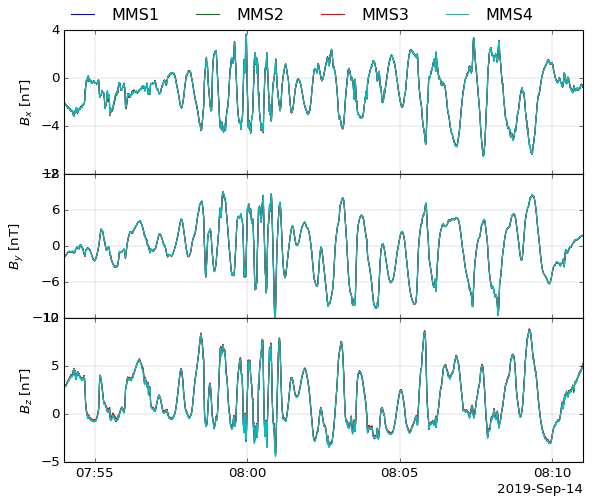

In [16]:
f, axs = plt.subplots(3, sharex="all", figsize=(9, 6))
f.subplots_adjust(hspace=0, left=0.1, right=0.82, bottom=0.05, top=0.95)

labels = ["MMS{:d}".format(i + 1) for i in range(4)]

for ax, j, c in zip(axs, [0, 1, 2], ["x", "y", "z"]):
    for i, b in enumerate(b_mms):
        plot_line(ax, b[:, j])

    ax.set_ylabel("$B_{}$ [nT]".format(c))

f.legend(labels, loc="upper center", borderaxespad=0.1, ncol=4, frameon=False)